#Homework-3 Question-2
###Name: Mitanshu Bhoot
###Dataset: GrapeVine Leaves (5 classes)
### Project Objective

This project focuses on leveraging image data to differentiate between multiple types of grape leaves, such as 'Nazli', 'Dimnit', 'Ak', 'Buzgulu', and 'Ala_Idris'. The classification model will be trained to identify these leaf varieties from raw images with accuracy.


In [ ]:
#Importing important modules
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


Processing Ala_Idris: 100%|██████████| 100/100 [00:04<00:00, 23.59it/s]


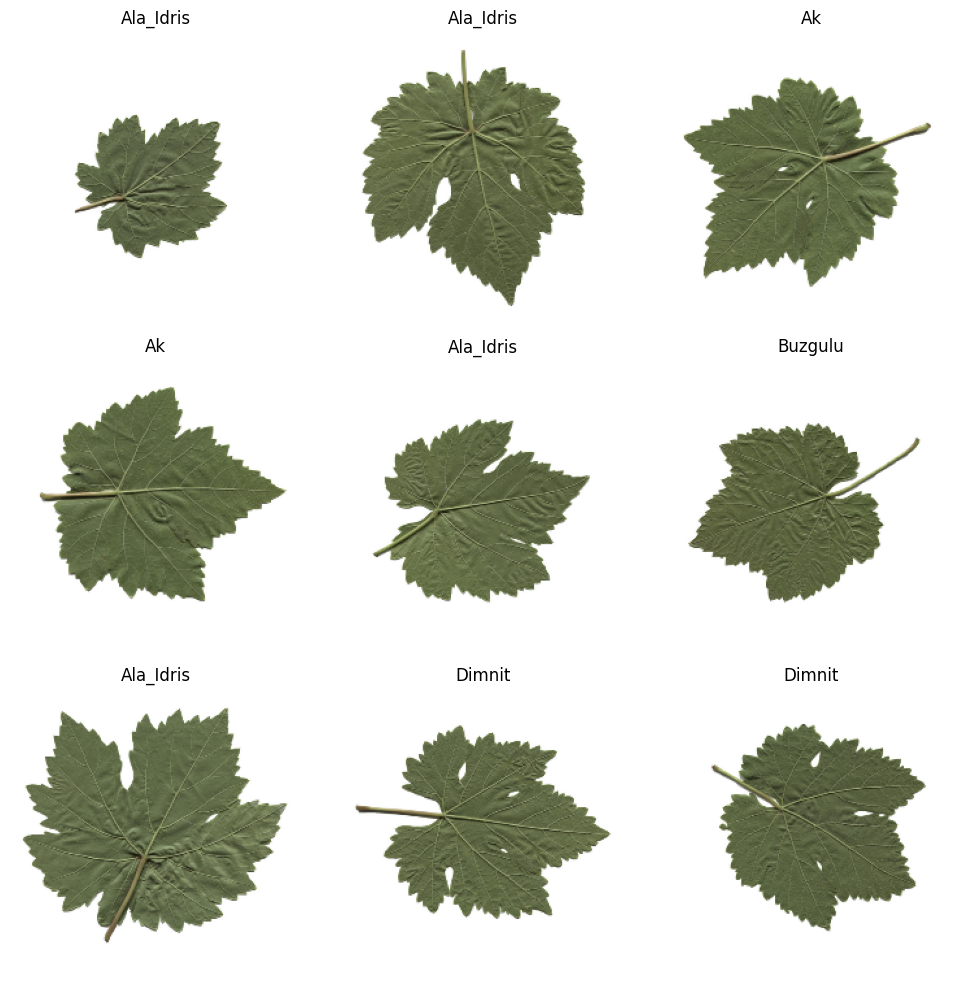

In [ ]:
# Mounting drive and loading images
import os
import cv2
from tqdm import tqdm
from google.colab import drive
import random

drive.mount('/content/drive')

# Path to the dataset
dataset_path = '/content/drive/My Drive/Data/H3Q2/Grapevine_Leaves_Image_Dataset'
IMG_SIZE = 224

def load_images_from_folder(folder_path):
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for image_name in tqdm(os.listdir(label_path), desc=f"Processing {label}"):
                image_path = os.path.join(label_path, image_name)

                image = cv2.imread(image_path)
                if image is None:
                    continue
                image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                images.append(image)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_from_folder(dataset_path)

images = images / 255.0
df = pd.DataFrame({
    'image': list(images),
    'label': labels
})

def display_sample_images(images, labels, num_samples=9):
    plt.figure(figsize=(10, 10))
    indices = random.sample(range(len(images)), num_samples)

    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(labels[idx])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_sample_images(images, labels)

*- The leaf samples from different classes (e.g., "Ak", "Nazli", "Buzgulu", "Ala_Idris") show distinct shapes, edges, and vein patterns. This visual distinction suggests that a model can leverage these features for accurate classification.*

*- The leaves appear well-centered and isolated on a plain background, which reduces noise and makes it easier for our model to focus on relevant features. This consistent formatting could advantageous for improving model performance during training.*

Class Distribution:


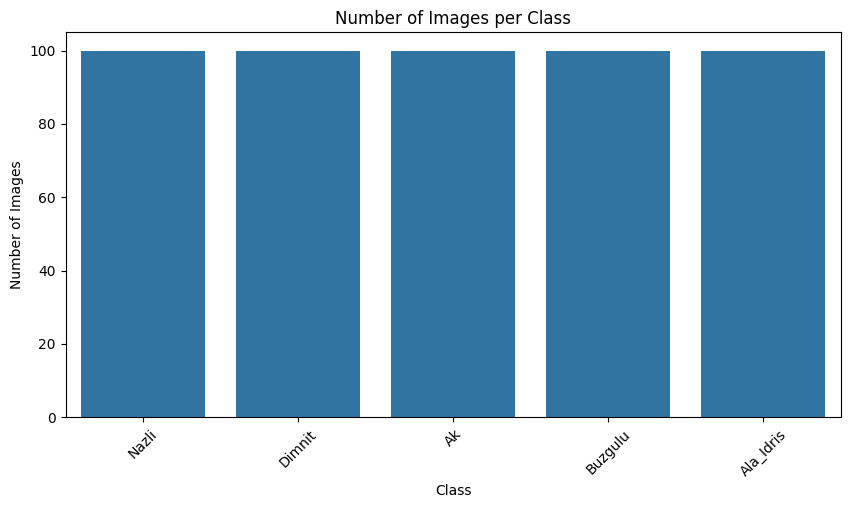

In [ ]:
# We now check the distribution of images across different classes.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def get_class_distribution(labels):
    class_counts = Counter(labels)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title("Number of Images per Class")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

print("Class Distribution:")
get_class_distribution(labels)

*- The bar chart shows that each class has the same number of images (100 per class). This will benefit our model as it helps prevent class imbalance, which can lead to biased model predictions.*

*- This makes our job easier as no additional data augmentation or resampling techniques are needed to balance the dataset. This ensures that the model will not be biased towards any particular class during training.*

In [ ]:
#Image Dataset Statistics

print("\n--- Image Statistics ---")
image_shape = images[0].shape
image_dtype = images[0].dtype
print("Shape:", image_shape)
print("Datatype:", image_dtype)

image_array = np.array(images)
mean_intensity = np.mean(image_array)
std_intensity = np.std(image_array)
min_intensity = np.min(image_array)
max_intensity = np.max(image_array)

print("\n--- Image Intensity Statistics ---")
print("Mean:", mean_intensity)
print("Standard Deviation:", std_intensity)
print("Min Intensity:", min_intensity)
print("Max Intensity:", max_intensity)


--- Image Statistics ---
Shape: (224, 224, 3)
Datatype: float64

--- Image Intensity Statistics ---
Mean: 0.7929500815430357
Standard Deviation: 0.3033784312635849
Min Intensity: 0.0196078431372549
Max Intensity: 1.0


*- The maximum intensity value is 1.0 and the minimum is close to 0, indicating that the images are already normalized to a range of [0, 1]. This coould be essential for training our deep learning model as it ensures numerical stability and faster convergence.*

*- The mean intensity of approximately 0.79 suggests that the images are generally bright, which could influence model performance if the dataset is not balanced with varying lighting conditions. The standard deviation of 0.30 indicates a reasonable spread of intensity values, implying decent variability in the dataset.*

**1. Apply PCA to the images. How many components do you need to preserve 90% of the variance?**

In [ ]:
# Applying PCA on flattened image data to determine the number of components required for 90% variance retention
from sklearn.decomposition import PCA
import numpy as np

image_vectors = [image.flatten() for image in images]

pca_model = PCA()
pca_model.fit(image_vectors)

explained_variance = pca_model.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

components_for_90_variance = np.argmax(cumulative_variance >= 0.9) + 1

print(f"To retain 90% of the total variance, {components_for_90_variance} principal components are required.")

To retain 90% of the total variance, 214 principal components are required.


*- The need for **214 principal components** to retain **90% of the variance** indicates that the dataset is quite high-dimensional. This suggests that the images contain a lot of complex features and variability, which the model may need to capture for accurate classification.*

*- Reducing the data to 214 components while still retaining 90% of the variance is a significant reduction in complexity. This can help improve the efficiency of our model, reducing training time and potentially enhancing model generalization by filtering out noise.*

**2. Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 90% of variance using PCA.**

Original number of features: 150528
Reduced number of features: 214
Explained variance ratio: 0.90



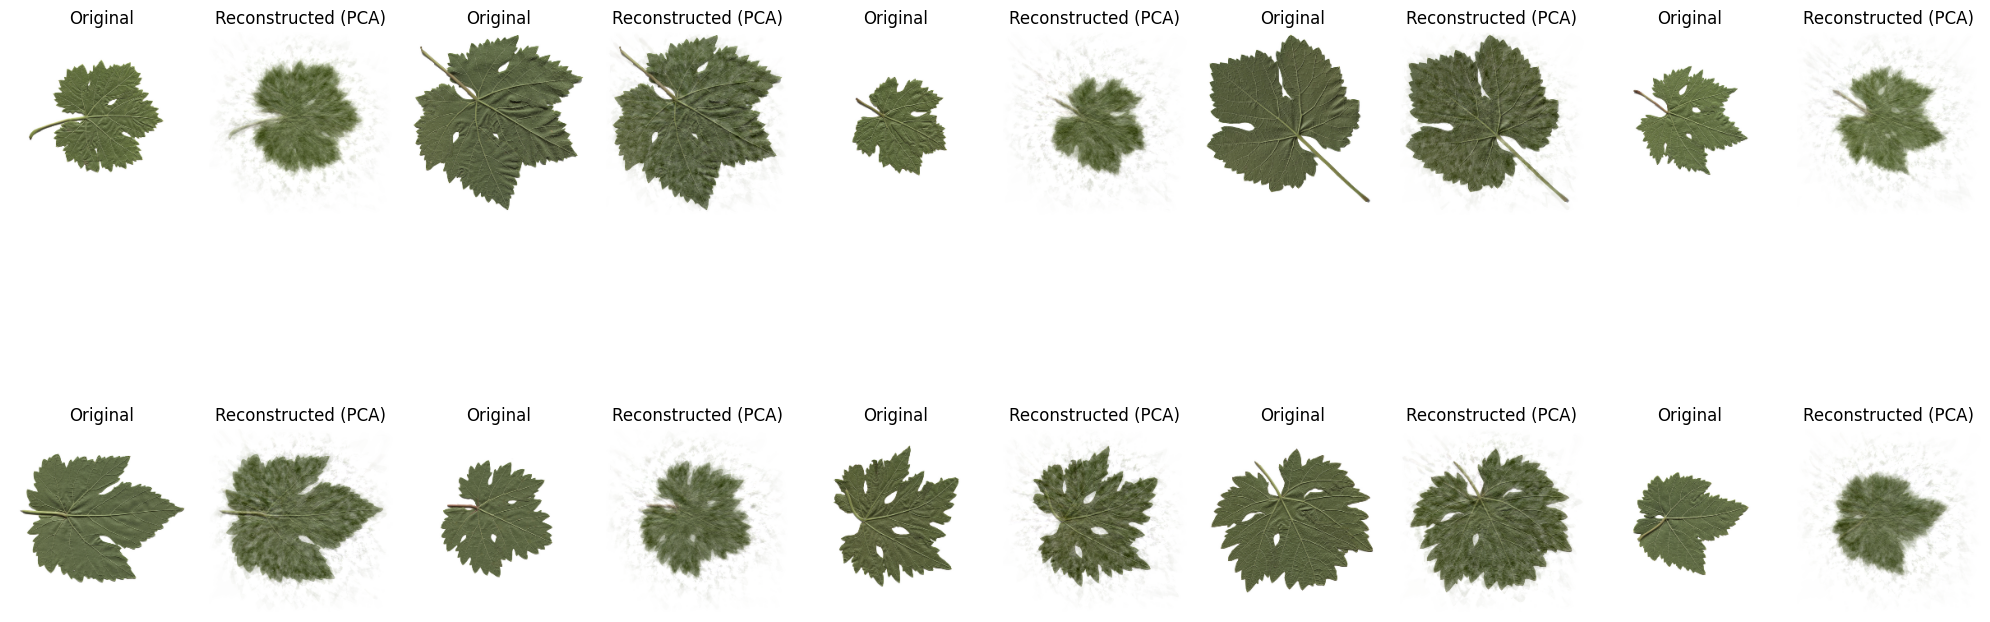

In [ ]:
# Displaying original and PCA-reconstructed images
def flatten_images(images):
    num_images = images.shape[0]
    flattened = images.reshape(num_images, -1)
    return flattened

def pca_reconstruct_images(images, variance_threshold=0.9):
    flattened_images = flatten_images(images)

    pca = PCA(n_components=variance_threshold)
    reduced_images = pca.fit_transform(flattened_images)

    reconstructed_images = pca.inverse_transform(reduced_images)
    reconstructed_images = reconstructed_images.reshape(images.shape)

    print(f"Original number of features: {flattened_images.shape[1]}")
    print(f"Reduced number of features: {pca.n_components_}")
    print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_):.2f}\n")

    return reconstructed_images, pca

def display_original_vs_reconstructed(images, reconstructed_images, num_samples=10):
    num_columns = 10
    num_rows = (num_samples // 2)

    plt.figure(figsize=(20, 4 * num_rows))
    indices = np.random.choice(len(images), num_samples, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(num_rows, num_columns, 2 * i + 1)
        plt.imshow(images[idx])
        plt.title(f"Original")
        plt.axis('off')

        plt.subplot(num_rows, num_columns, 2 * i + 2)
        plt.imshow(np.clip(reconstructed_images[idx], 0, 1))
        plt.title(f"Reconstructed (PCA)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


reconstructed_images, pca = pca_reconstruct_images(images, variance_threshold=0.9)
display_original_vs_reconstructed(images, reconstructed_images)

*- The reconstructed images using **214 principal components** (out of the original **150,528 features**) retain the general shape and structure of the original leaf images, despite the significant dimensionality reduction. This shows that PCA was effective in capturing the essential features while reducing noise.*

*- While the reconstructed images are quite similar to the originals, some fine details, such as texture and vein intricacies, appear blurred or lost. This is expected when reducing dimensionality, but the retained features are likely still sufficient for our task of classification and pattern recognition.*

**3. A) Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components?**

In [ ]:
# Applying PCA to reduce image data to 2 dimensions and calculate explained variance
pca_model = PCA(n_components=2) # taking only 2 dimensions
pca_model.fit(image_vectors)

variance_ratio = pca_model.explained_variance_ratio_
total_explained_variance = np.sum(variance_ratio)

print("Total variance explained by the first two principal components:", total_explained_variance)

Total variance explained by the first two principal components: 0.34560995329739214


*- The first two principal components together explain only about **34.56%** of the total variance in the dataset. This indicates that a significant amount of information is distributed across many components, suggesting the data is high-dimensional and complex.*

*- Since the first two components do not capture a majority of the variance, reducing the data to just two dimensions might not be sufficient for tasks requiring accurate representation (e.g., clustering or classification). More components would likely be needed to retain important features of the data.*

**3. B) Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category. Repeat the process and create the same type of plots for t-SNE, LLE and MDS.**

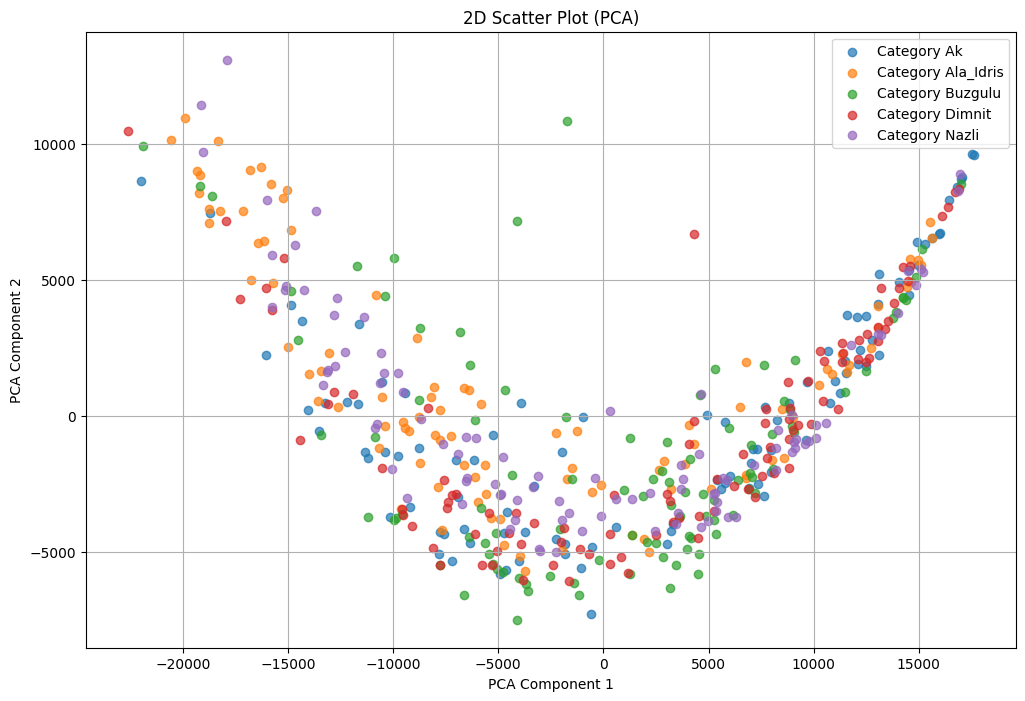

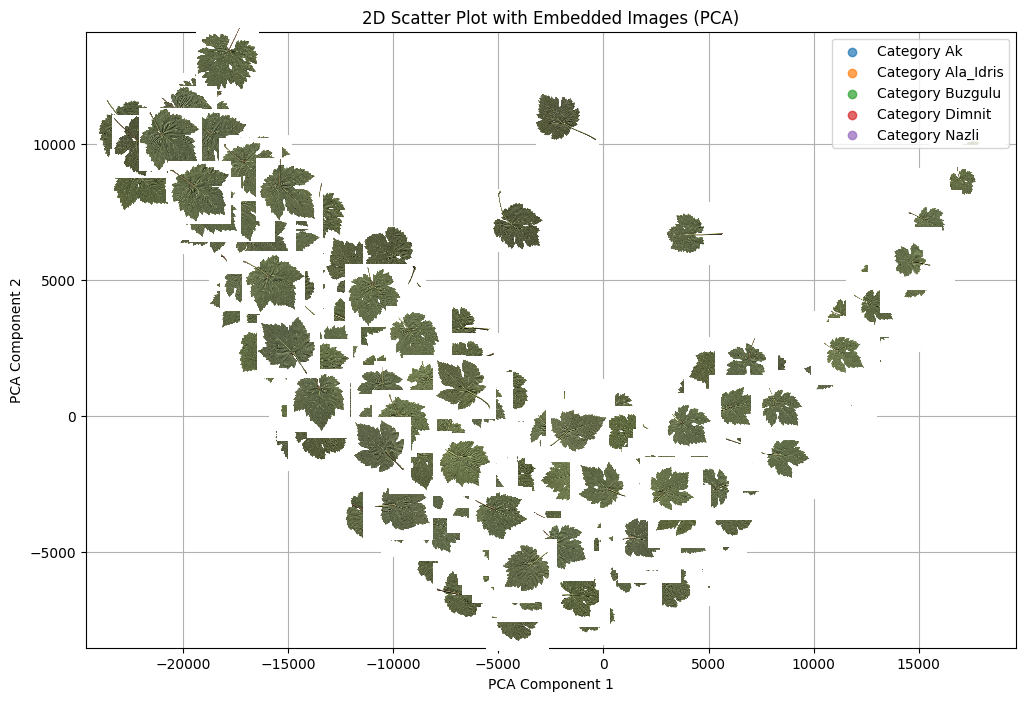

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

IMG_SIZE = 224

def load_images_from_folder(folder_path):
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                file_path = os.path.join(label_path, filename)

                image = cv2.imread(file_path)
                if image is None:
                    continue
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

                images.append(image)
                labels.append(label)

    return np.array(images), np.array(labels)

# Loading images and labels
images, labels = load_images_from_folder(dataset_path)

# Flatten the images for dimensionality reduction
flattened_image_data = images.reshape(len(images), -1)
unique_labels = np.unique(labels)

# Scatter plots
def plot_scatter(transformed_data, labels, title, method):
    plt.figure(figsize=(12, 8))
    for label in unique_labels:
        indices = np.where(labels == label)
        plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1],
                    label=f'Category {label}', alpha=0.7)
    plt.title(f'2D Scatter Plot ({method})')
    plt.xlabel(f'{method} Component 1')
    plt.ylabel(f'{method} Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Scatter plot with embedded images
def plot_scatter_with_images(transformed_data, images, labels, title, method):
    plt.figure(figsize=(12, 8))
    for label in unique_labels:
        indices = np.where(labels == label)
        plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1],
                    label=f'Category {label}', alpha=0.7)
    for idx in range(len(images)):
        image_array = images[idx]
        image_offset = OffsetImage(image_array, zoom=0.2)
        annotation_box = AnnotationBbox(image_offset, transformed_data[idx], frameon=False)
        plt.gca().add_artist(annotation_box)
    plt.title(f'2D Scatter Plot with Embedded Images ({method})')
    plt.xlabel(f'{method} Component 1')
    plt.ylabel(f'{method} Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

pca_model = PCA(n_components=2)
pca_transformed_data = pca_model.fit_transform(flattened_image_data)

# PCA Scatter Plot (without images)
plot_scatter(pca_transformed_data, labels, 'PCA', 'PCA')

# PCA Scatter Plot (with images)
plot_scatter_with_images(pca_transformed_data, images, labels, 'PCA', 'PCA')

*- The different categories ("Ak", "Ala_Idris", "Buzgulu", "Dimnit", and "Nazli") show significant overlap in the 2D projection. This suggests that, even after dimensionality reduction, the categories are not clearly separable, indicating that these groups may share similarities in their features, or that the PCA components do not capture enough variance to clearly distinguish between them.*

*- The data points appear to form a curved, arc-like pattern rather than being spread out linearly. This pattern indicates that the underlying structure of the data might be non-linear, which means that PCA (a linear technique) may not be fully effective in capturing the complexities of the dataset.*

**t-SNE :**

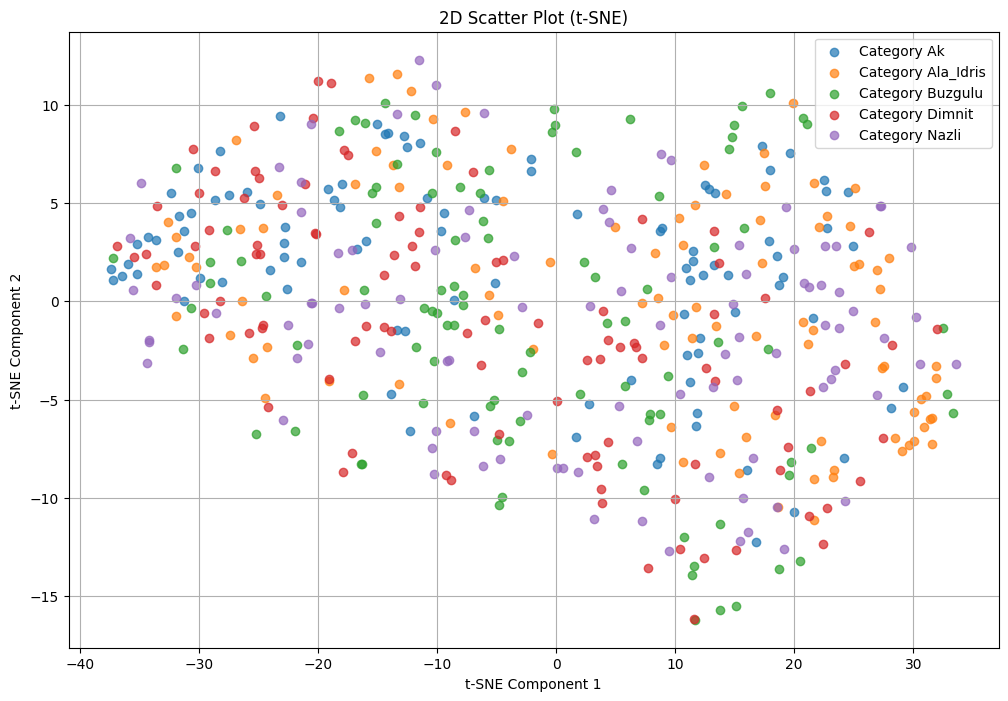

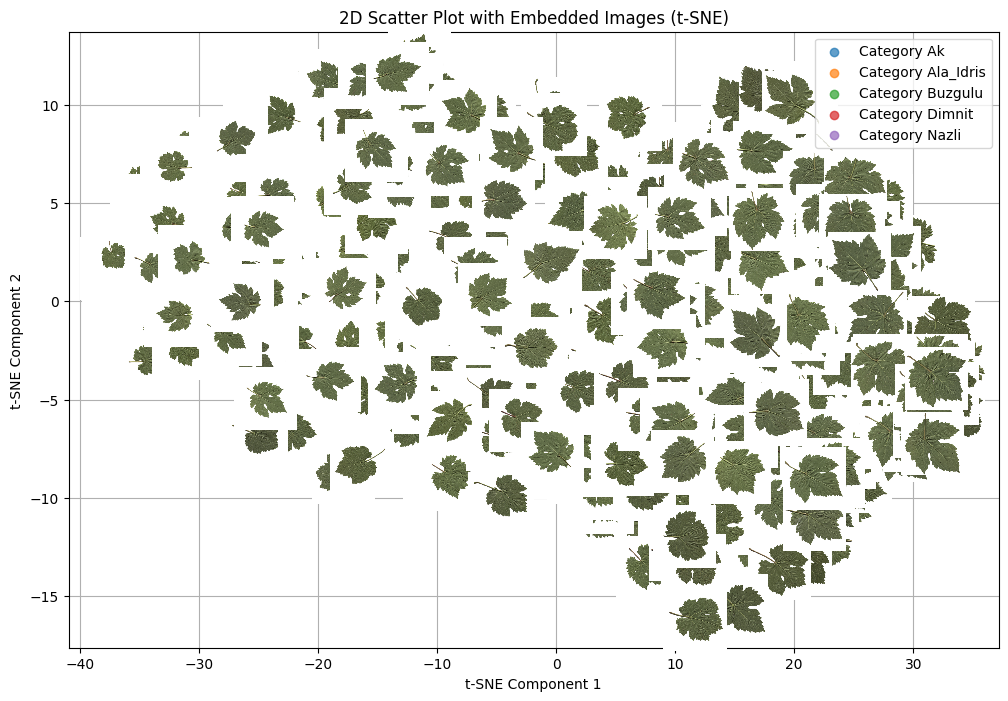

In [ ]:
# Applying t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_transformed_data = tsne_model.fit_transform(flattened_image_data)

# t-SNE Scatter Plot (without images)
plot_scatter(tsne_transformed_data, labels, 't-SNE', 't-SNE')

# t-SNE Scatter Plot (with images)
plot_scatter_with_images(tsne_transformed_data, images, labels, 't-SNE', 't-SNE')

*- Compared to the PCA plot, the t-SNE plot shows better clustering and separation of the categories. While there are still overlaps between categories, there are more visible clusters, indicating that t-SNE is capturing the non-linear relationships in the data more effectively than PCA. However, some categories, like "Ala_Idris" and "Nazli", still have overlapping areas, suggesting that there are shared features among them.*

*- The t-SNE plot shows that data points of the same category are more likely to cluster together in localized regions. For instance, "Ak" and "Dimnit" have clusters that are more distinct from the rest. This suggests that t-SNE is better at preserving local similarities, making it effective for visualizing high-dimensional data with complex structures.*

**LLE :**

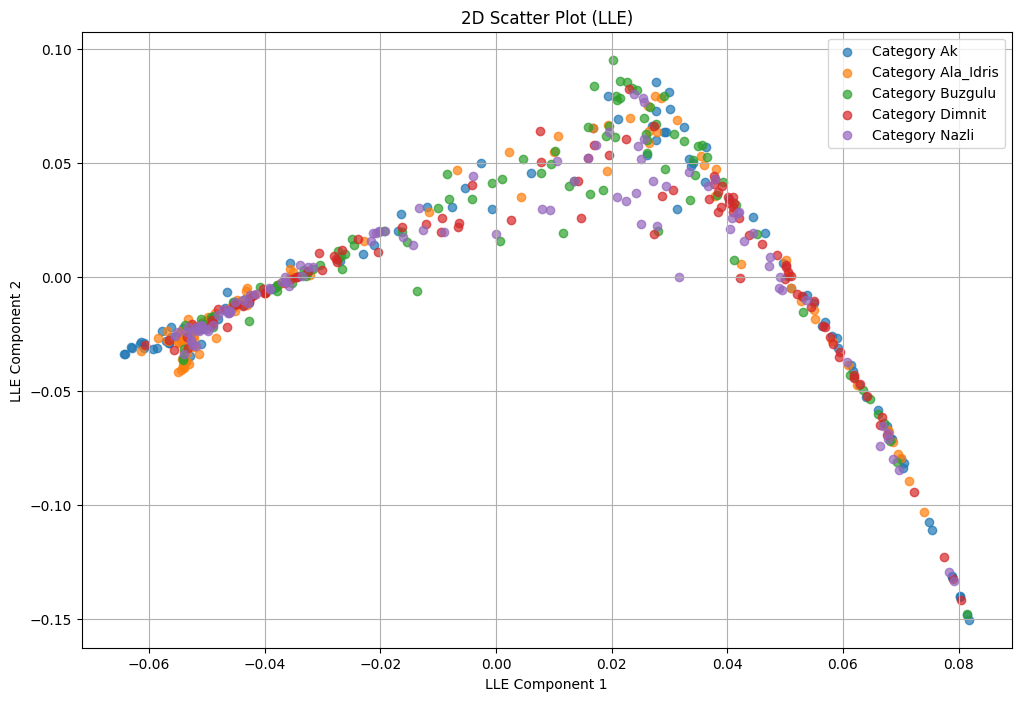

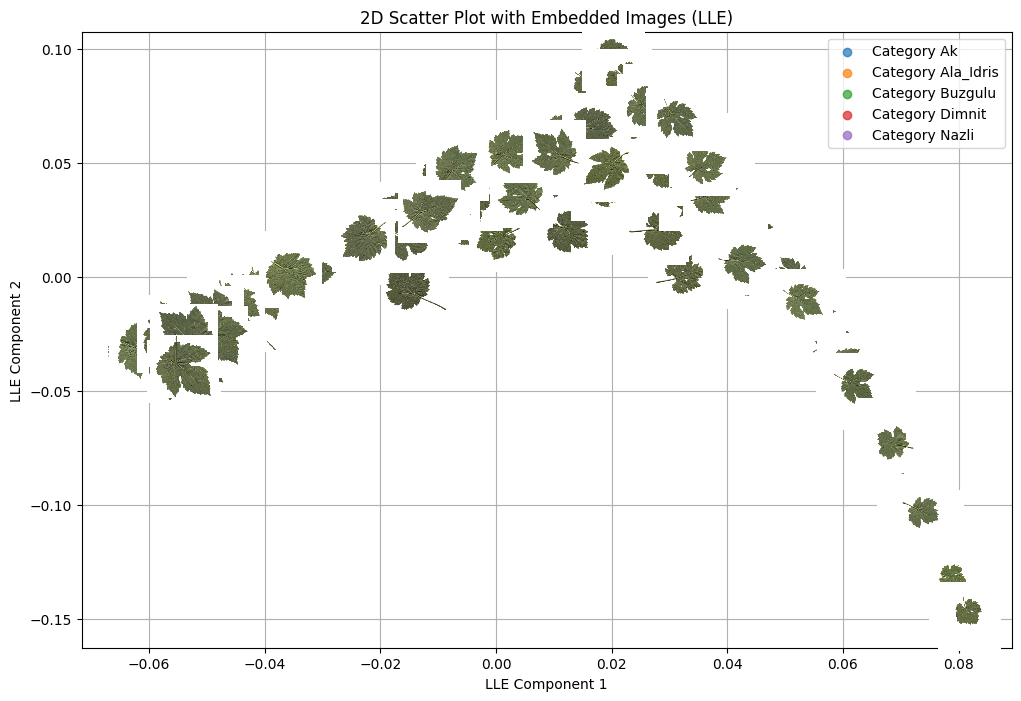

In [ ]:
# Applying Locally Linear Embedding (LLE)
lle_model = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
lle_transformed_data = lle_model.fit_transform(flattened_image_data)

# LLE Scatter Plot (without images)
plot_scatter(lle_transformed_data, labels, 'LLE', 'LLE')

# LLE Scatter Plot (with images)
plot_scatter_with_images(lle_transformed_data, images, labels, 'LLE', 'LLE')

*- The data points appear to form an arc-like structure with a relatively continuous curve, indicating that LLE is capturing a smooth, underlying manifold structure. Unlike PCA and t-SNE, the LLE plot suggests that the data lies on a lower-dimensional non-linear manifold. However, the categories are not well separated; instead, they are more mixed along this arc, implying that LLE emphasizes preserving the local geometry rather than focusing on cluster separation.*

*- Despite revealing an underlying manifold, LLE does not perform well in separating different categories in this case. The colors representing the categories ("Ak", "Ala_Idris", "Buzgulu", "Dimnit", "Nazli") are heavily intermixed, suggesting that LLE might not be effective for distinguishing between these categories based on the current feature set. This might indicate that the features themselves do not inherently provide good separability or that LLE is not the optimal method for this type of data.*


**MDS :**

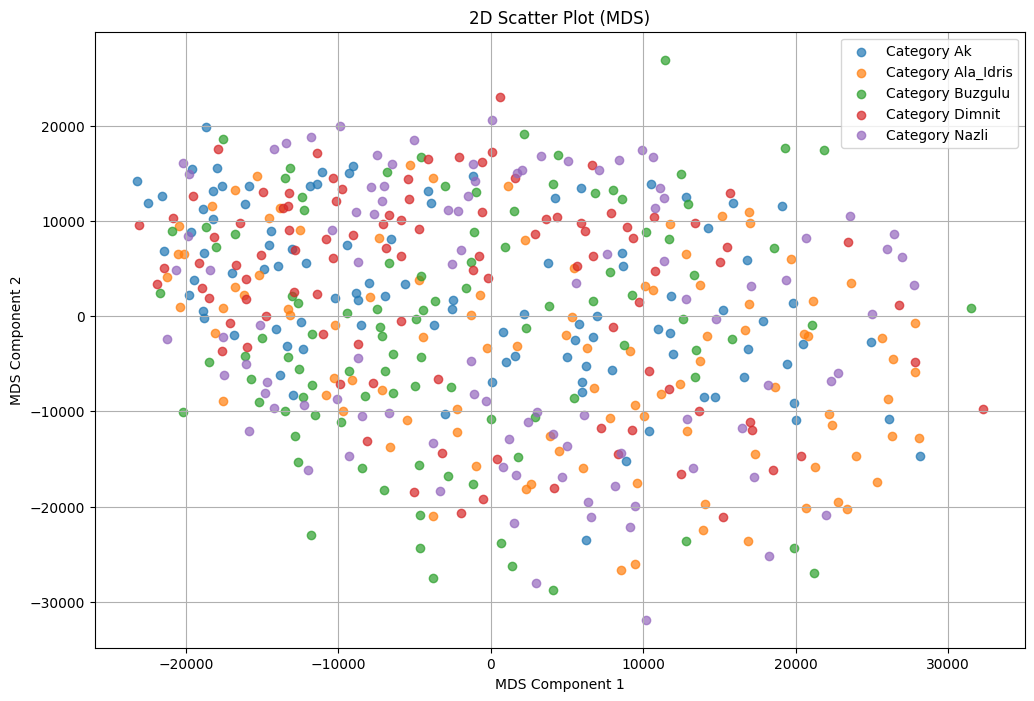

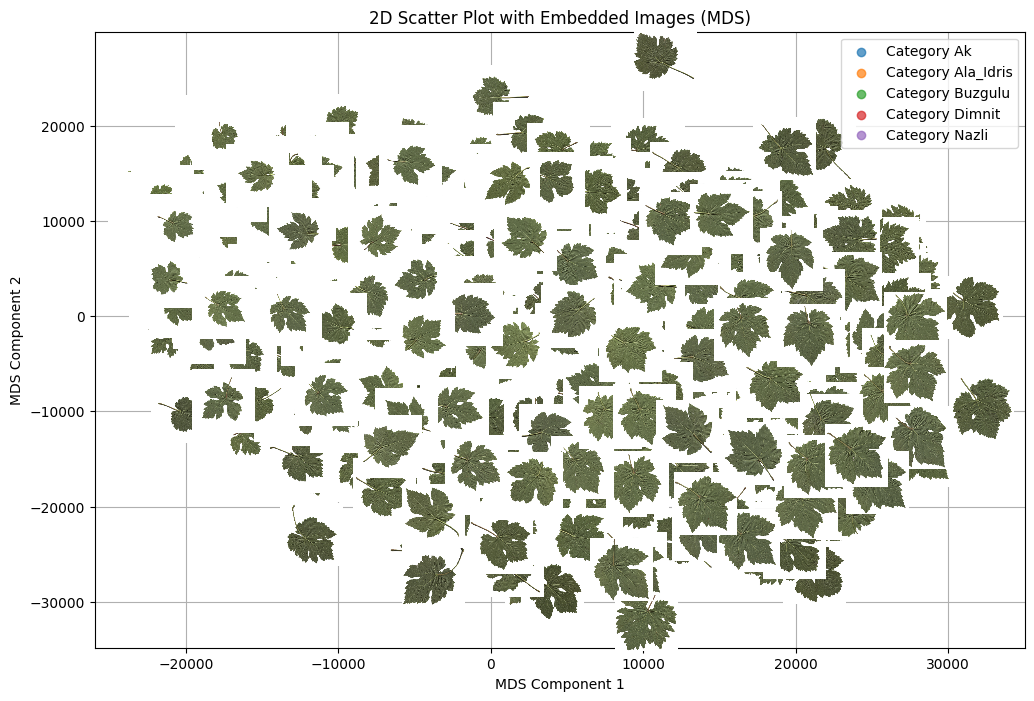

In [ ]:
# Applying Multidimensional Scaling (MDS)
mds_model = MDS(n_components=2, random_state=42)
mds_transformed_data = mds_model.fit_transform(flattened_image_data)

# MDS Scatter Plot (without images)
plot_scatter(mds_transformed_data, labels, 'MDS', 'MDS')

# MDS Scatter Plot (with images)
plot_scatter_with_images(mds_transformed_data, images, labels, 'MDS', 'MDS')

*- The MDS plot shows that there is significant overlap between the different categories ("Ak", "Ala_Idris", "Buzgulu", "Dimnit", "Nazli"). The data points are dispersed fairly evenly without forming distinct clusters for each category. This suggests that, while MDS attempts to preserve pairwise distances in a lower-dimensional space, the features in the current dataset do not provide strong separability between categories. The lack of clear grouping might indicate that the categories have a high degree of similarity or overlap in feature space.*

*- Compared to PCA and LLE, the MDS plot exhibits a more uniform spread of data points across the plane, without strong curvature or arc patterns. This implies that MDS is effective in preserving the global distances between points, resulting in a more evenly distributed scatter plot. However, since the categories are not well separated, MDS may not be ideal for classification purposes with this dataset.*

**3. C) Summary and Discussion :**


- **PCA (Principal Component Analysis)**:
  - Significant overlap among categories with a non-linear arc-like pattern, indicating that the dataset has non-linear structures that PCA cannot capture well.
  - Limited category separation, suggesting PCA may not be the best approach for this dataset.

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**:
  - Improved clustering with some localized groupings compared to PCA, showing better capture of non-linear relationships.
  - Still some overlap between categories, but t-SNE preserves local similarities more effectively, making it more suitable for visualizing complex data.

- **LLE (Locally Linear Embedding)**:
  - Revealed an underlying curved, manifold structure, but with heavy mixing of categories along this curve.
  - Focuses on preserving local geometry, which results in poor category discrimination in this case.

- **MDS (Multidimensional Scaling)**:
  - Displays a more uniform distribution of data points while preserving global distances, but does not result in clear clusters for the categories.
  - High overlap suggests that the features may not provide sufficient separability, or that MDS is not ideal for distinguishing the categories.

Overall, t-SNE appears to be the most effective at capturing some structure while PCA, LLE, and MDS struggle with category separation.

**5. Cluster the 360 images using K-Means**

**5. A) You can reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class**

Original shape: (500, 150528)
Reduced shape: (500, 214)
Silhouette Score for 2 clusters: 0.2171
Silhouette Score for 3 clusters: 0.1622
Silhouette Score for 4 clusters: 0.0974
Silhouette Score for 5 clusters: 0.0877
Silhouette Score for 6 clusters: 0.0791
Silhouette Score for 7 clusters: 0.0587
Silhouette Score for 8 clusters: 0.0621
Silhouette Score for 9 clusters: 0.0626

Optimal number of clusters based on Silhouette Score: 2


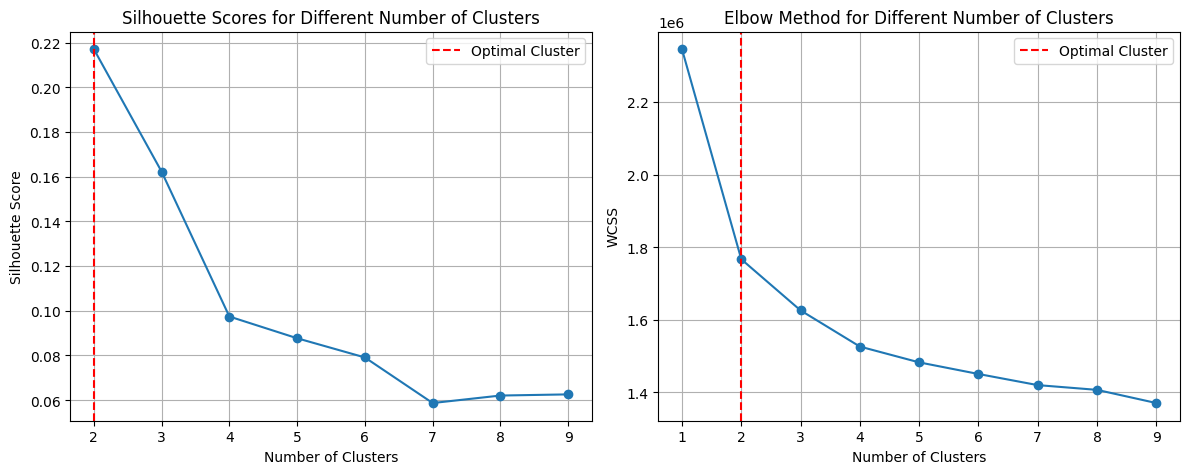

In [ ]:
# Determining the optimal number of clusters using Silhouette Scores and Elbow Method
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

flattened_image_data = images.reshape(len(images), -1)
pca_model = PCA(n_components=0.9)
pca_transformed_data = pca_model.fit_transform(flattened_image_data)

print(f"Original shape: {flattened_image_data.shape}")
print(f"Reduced shape: {pca_transformed_data.shape}")

silhouette_scores = []
wcss = []

range_clusters1 = range(2, 10)
range_clusters2 = range(1,10)

for n_clusters in range_clusters1:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_transformed_data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.4f}")

for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_transformed_data)

    # Calculate WCSS (Elbow Method)
    wcss.append(kmeans.inertia_)

optimal_clusters_silhouette = range_clusters1[np.argmax(silhouette_scores)]

print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_clusters_silhouette}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_clusters1, silhouette_scores, marker='o')
plt.axvline(x=optimal_clusters_silhouette, linestyle='--', color='r', label='Optimal Cluster')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range_clusters2, wcss, marker='o')
plt.axvline(x=2, linestyle='--', color='r', label='Optimal Cluster')
plt.title('Elbow Method for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

We here have used two different methods for determining the optimal number of clusters for K-Means:

1. **Silhouette Method**:
   - According to the silhouette scores, the highest score is for **2 clusters** (`0.2171`).
   - As the number of clusters increases, the silhouette score decreases, indicating a poorer cluster fit. This suggests that when our data is divided into 2 clusters, it achieves the best separation and cohesion among clusters.

2. **Elbow Method**:
   - The elbow plot indicates that the **optimal number of clusters is 2**, where the curve begins to bend more gently, suggesting diminishing returns for adding more clusters.
   - The sum of squared distances (WCSS) decreases sharply up to 2 clusters and then flattens, indicating that additional clusters don’t improve the fit significantly.

## Difference between the methods?
- These methods often yield different results because they are based on different metrics:
  - **Silhouette Score** evaluates how well each data point fits within its assigned cluster relative to other clusters.
  - **Elbow Method** focuses on minimizing the variance within each cluster.
- Because our dataset has overlapping clusters or non-globular shapes, these methods can interpret the structure differently. The silhouette method can be more sensitive to overlap, while the elbow method focuses more on data density and variance.

## So, which method to trust generally?
- If our primary goal is to **maximize cluster cohesion and separation**, then the silhouette score suggesting **2 clusters** may be more appropriate.
- If we're more interested in **reducing overall variance within clusters**, we might choose to go with the elbow method's recommendation.
  
But since, we already know there are 5 classes of leaves, so our goal is to cluster the leaves into 5 clusters, so we wont be choosing any of the results from above for the next segment.

**5. B) Set the number of clusters to 5 and report clustering accuracy.**

In [ ]:
# Applying K-Means with 5 clusters
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics import adjusted_rand_score
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

kmeans_model = KMeans(n_clusters=5, random_state=42) # 5 clusters for 5 leave classes
kmeans_labels = kmeans_model.fit_predict(pca_transformed_data)

In [ ]:
# Calculating Clustering Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, adjusted_rand_score

def map_labels(true_labels, cluster_labels):
    label_mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        most_common_label = np.unique(true_labels[mask], return_counts=True)
        mapped_label = most_common_label[0][np.argmax(most_common_label[1])]
        label_mapping[cluster] = mapped_label
    return np.array([label_mapping[cluster] for cluster in cluster_labels])

mapped_labels = map_labels(labels, kmeans_labels)
accuracy = accuracy_score(labels, mapped_labels)
print(f"Clustering Accuracy: {accuracy:.2f}\n")

silhouette_avg = silhouette_score(pca_transformed_data, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}\n")

ari_score = adjusted_rand_score(labels, kmeans_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.2f}\n")

conf_matrix = confusion_matrix(labels, mapped_labels)
print("Confusion Matrix:")
print(conf_matrix)


Clustering Accuracy: 0.31

Silhouette Score: 0.09

Adjusted Rand Index (ARI): 0.03

Confusion Matrix:
[[60  6 26  8  0]
 [37 25 22 16  0]
 [25  5 45 25  0]
 [33  7 34 26  0]
 [26 18 36 20  0]]


*- The result indicates that the K-Means algorithm struggled to correctly classify the data into the 5 intended classes. This suggests that the clusters formed by K-Means do not align well with the actual class labels. Potential reasons could include overlapping clusters or non-globular shapes in our data that K-Means (which assumes spherical clusters) cannot capture effectively.*

*- The silhouette score of **0.09** (close to zero) indicates **poor cohesion and separation** among the clusters. Ideally, a higher score (closer to 1) reflects well-separated clusters. This low value suggests that many data points are either overlapping or assigned to the wrong cluster, leading to ambiguous boundaries between clusters.*

*- The confusion matrix shows that most predicted clusters overlap significantly across true labels. For instance, there are no strong diagonal entries where a single predicted cluster maps predominantly to a single true class, indicating a lack of clear cluster-class correspondence.*

*What are some recommendations that we can think of at this stage?:*

*- We can consider trying clustering algorithms that can handle more complex cluster shapes, such as **Gaussian Mixture Models** or **DBSCAN**.*

*- Applying **other feature engineering** or other **different dimensionality reduction techniques** (like t-SNE) might help in obtaining better separability in the data.*

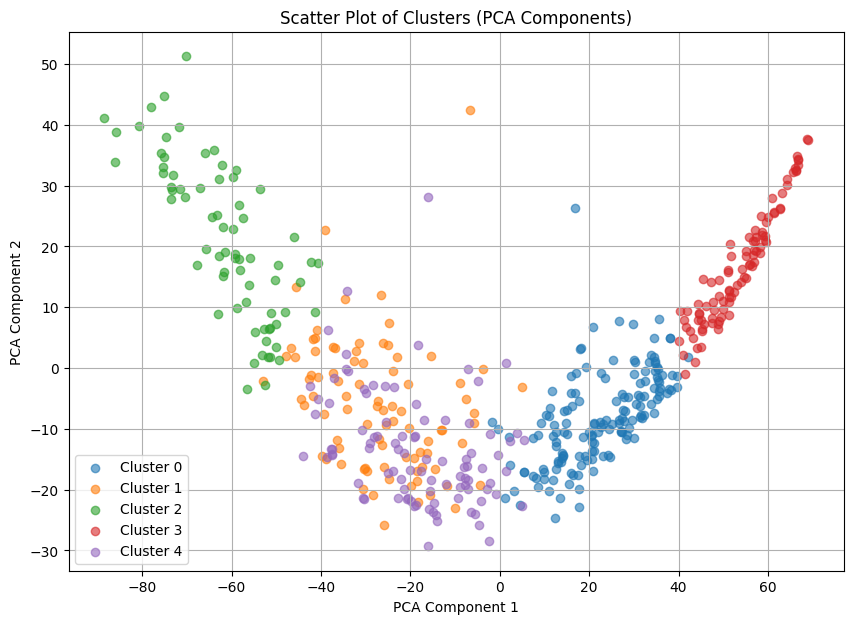

In [ ]:
# Scatter plot of the PCA-transformed data with cluster labels (3 Clusters)
plt.figure(figsize=(10, 7))
unique_clusters = np.unique(kmeans_labels)

for cluster in unique_clusters:
    indices = (kmeans_labels == cluster)
    plt.scatter(pca_transformed_data[indices, 0], pca_transformed_data[indices, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Scatter Plot of Clusters (PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

*- The scatter plot shows **5 distinct clusters** formed by the K-Means algorithm in the reduced PCA space.*
   
*- Some clusters (like the green and red ones) appear to be well-separated, suggesting that K-Means successfully identified these groups.*
   
*- However, there is **significant overlap** between certain clusters (e.g., clusters 0, 1, and 4), indicating that the separation between these groups may not be very clear.*

*- The low **silhouette score (0.09)** and **clustering accuracy (32%)** we reported earlier align with the visual observation that clusters are not well-separated.*

*- The overlapping clusters suggest that K-Means may not be the most effective algorithm for this data, especially if the actual distribution of data points is not spherical.*


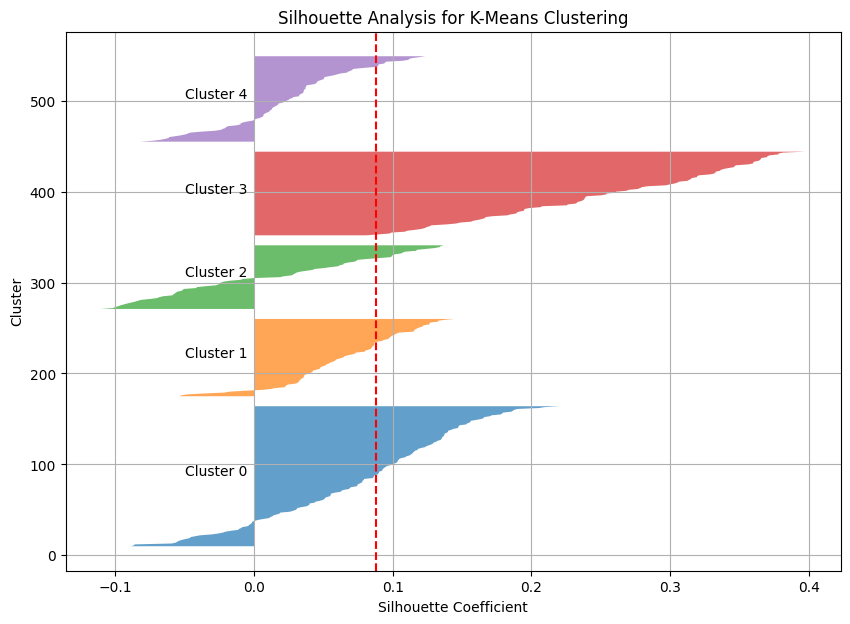

In [ ]:
#Silhouette Analysis for K-Means Clustering
from sklearn.metrics import silhouette_samples

sample_silhouette_values = silhouette_samples(pca_transformed_data, kmeans_labels)

plt.figure(figsize=(10, 7))
y_lower = 10
for i in range(5):  # 5 clusters
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')

    y_lower = y_upper + 10

plt.title("Silhouette Analysis for K-Means Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.grid(True)
plt.show()


*- **Poor cluster cohesion and separation** are evident, suggesting that the data may not be well-suited for K-Means clustering.*

**6. Cluster the 360 images using EM.**

**6. A) You can again reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class.**

Silhouette Score for 2 clusters: 0.2171
Silhouette Score for 3 clusters: 0.1622
Silhouette Score for 4 clusters: 0.0974
Silhouette Score for 5 clusters: 0.0877
Silhouette Score for 6 clusters: 0.0791
Silhouette Score for 7 clusters: 0.0587
Silhouette Score for 8 clusters: 0.0621
Silhouette Score for 9 clusters: 0.0626
Silhouette Score for 10 clusters: 0.0633

Optimal number of clusters based on AIC: 7
Optimal number of clusters based on BIC: 6


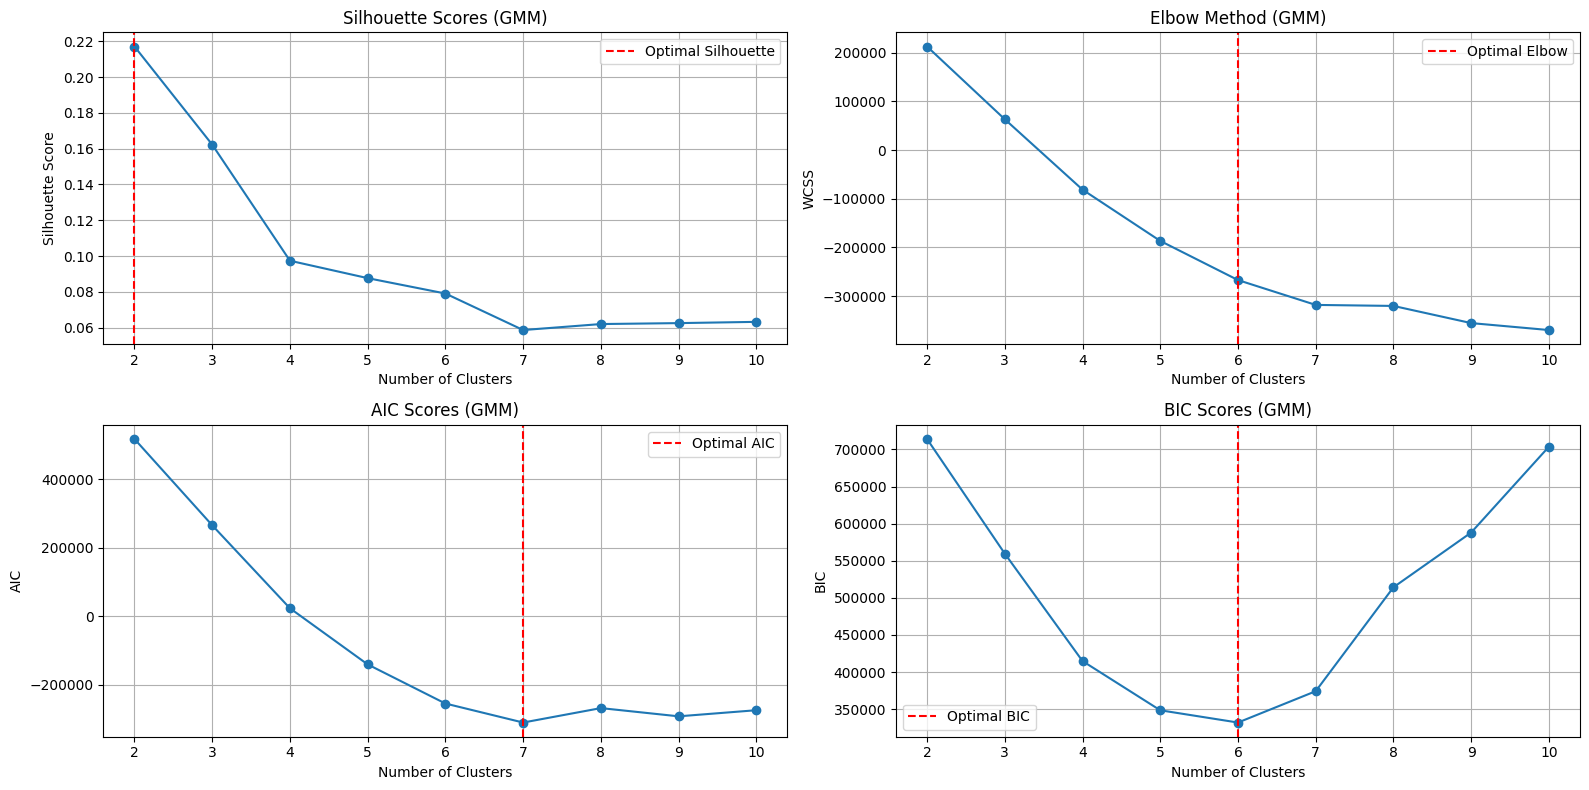

In [ ]:
# Determining number of clusters for GMM
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator

max_num_clusters = 10
silhouette_scores = []
wcss = []
aic_scores = []
bic_scores = []

for num_clusters in range(2, max_num_clusters + 1):
    gmm_model = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm_model.fit(pca_transformed_data)

    predicted_labels = gmm_model.predict(pca_transformed_data)

    score = silhouette_score(pca_transformed_data, predicted_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {num_clusters} clusters: {score:.4f}")

    wcss.append(-gmm_model.score(pca_transformed_data) * len(pca_transformed_data))

    # Calculate AIC and BIC scores
    aic_scores.append(gmm_model.aic(pca_transformed_data))
    bic_scores.append(gmm_model.bic(pca_transformed_data))

# Determine the optimal number of clusters using AIC and BIC
optimal_clusters_aic = np.argmin(aic_scores) + 2
optimal_clusters_bic = np.argmin(bic_scores) + 2

print(f"\nOptimal number of clusters based on AIC: {optimal_clusters_aic}")
print(f"Optimal number of clusters based on BIC: {optimal_clusters_bic}")

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.plot(range(2, max_num_clusters + 1), silhouette_scores, marker='o')
plt.axvline(x=np.argmax(silhouette_scores) + 2, linestyle='--', color='r', label='Optimal Silhouette')
plt.title('Silhouette Scores (GMM)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(2, max_num_clusters + 1), wcss, marker='o')
knee_locator = KneeLocator(range(2, max_num_clusters + 1), wcss, curve='convex', direction='decreasing')
plt.axvline(x=knee_locator.elbow, linestyle='--', color='r', label='Optimal Elbow')
plt.title('Elbow Method (GMM)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(2, max_num_clusters + 1), aic_scores, marker='o')
plt.axvline(x=optimal_clusters_aic, linestyle='--', color='r', label='Optimal AIC')
plt.title('AIC Scores (GMM)')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(2, max_num_clusters + 1), bic_scores, marker='o')
plt.axvline(x=optimal_clusters_bic, linestyle='--', color='r', label='Optimal BIC')
plt.title('BIC Scores (GMM)')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### *Interpretation of the Results*:

1. *Silhouette Scores (Top Left Plot)*:
   - The highest silhouette score is achieved with *2 clusters* (`0.22`), suggesting that 2 clusters result in the best separation and cohesion.
   - The silhouette score decreases significantly as the number of clusters increases, indicating diminishing cluster quality beyond *2 clusters*.

2. *Elbow Method (Top Right Plot)*:
   - The elbow point is found at *6 clusters*, where the curve starts to flatten. This indicates that adding more clusters beyond 6 does not significantly reduce the *WCSS (within-cluster sum of squares)*.

3. *AIC Scores (Bottom Left Plot)*:
   - The AIC decreases steadily and reaches a minimum at *7 clusters*, suggesting that this is the optimal number of clusters according to the *Akaike Information Criterion*.
   - Lower AIC values indicate better model fit with fewer parameters, but adding more clusters beyond *7* increases complexity without substantial benefit.

4. *BIC Scores (Bottom Right Plot)*:
   - The BIC reaches its minimum at *6 clusters*. BIC tends to penalize model complexity more heavily than AIC, which is why the optimal cluster count suggested here is slightly lower.
   - After *6 clusters*, the BIC score starts increasing, indicating that further clustering adds unnecessary complexity.

### *Which Method To Trust ?*

*- As studied, AIC and BIC are specifically designed to evaluate the fit of statistical models, especially when they involve likelihood estimation, which is the basis of GMM. Hence, we should ideally choose one of these 2 when using GMM.*

*- However, since we already know that our data contains 5 classes of grape leaves, we would be training our GMM with 5 classes further.*

**6. B) Set the number of clusters to 5 and report clustering accuracy.**

In [ ]:
# Apply GMM with the chosen number of clusters (5 in this case)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture

gmm_model = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm_model.fit_predict(pca_transformed_data)

def map_labels(true_labels, cluster_labels):
    label_mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        most_common_label = np.unique(true_labels[mask], return_counts=True)
        mapped_label = most_common_label[0][np.argmax(most_common_label[1])]
        label_mapping[cluster] = mapped_label
    return np.array([label_mapping[cluster] for cluster in cluster_labels])

mapped_labels = map_labels(labels, gmm_labels)
accuracy = accuracy_score(labels, mapped_labels)
print(f"Clustering Accuracy: {accuracy:.2f}\n")

ari_score = adjusted_rand_score(labels, gmm_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.2f}\n")

silhouette_avg = silhouette_score(pca_transformed_data, gmm_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}\n")

conf_matrix = confusion_matrix(labels, mapped_labels)
print("Confusion Matrix:\n")
print(conf_matrix)


Clustering Accuracy: 0.32

Adjusted Rand Index (ARI): 0.03

Silhouette Score: 0.09

Confusion Matrix:

[[60  7 33  0  0]
 [39 27 34  0  0]
 [20  8 72  0  0]
 [33  9 58  0  0]
 [27 20 53  0  0]]


*- The result indicates that the **GMM** model is not effectively clustering the data into the expected **5 classes**. Many data points are incorrectly assigned to clusters, suggesting poor alignment with the true labels.*

*- The confusion matrix shows significant overlap among clusters. For instance, true labels are scattered across multiple clusters without clear dominance.*
  
*- No cluster is exclusively associated with a single true class, indicating that the GMM struggled to distinguish the groups clearly.*

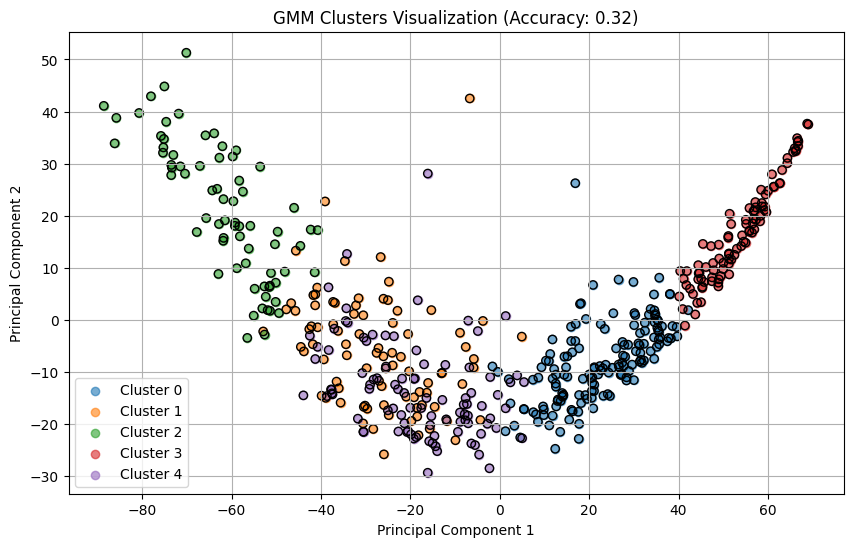

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 6))

for cluster in np.unique(gmm_labels):
    cluster_points = pca_transformed_data[gmm_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

for label in np.unique(labels):
    true_points = pca_transformed_data[labels == label]
    plt.scatter(true_points[:, 0], true_points[:, 1], edgecolor='k', facecolors='none', marker='o')

plt.title(f'GMM Clusters Visualization (Accuracy: {accuracy:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

*Again, we could see signifanct overlaps between the datapoints which is an indication of poor performance of GMM on this particular dataset*

**6. C) Use the model to generate 20 new rocks (using the sample() method), and visualize them in the original image space (since you used PCA, you will need to use its inverse_transform() method).**

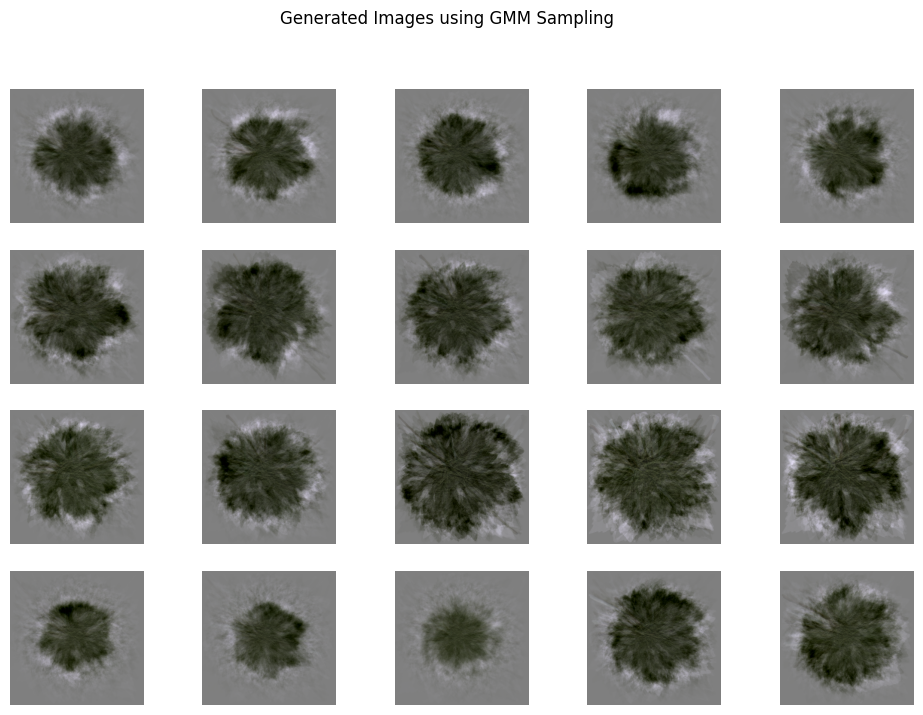

In [ ]:
# Generating 20 new samples using the GMM
import matplotlib.pyplot as plt
import numpy as np

num_samples = 20
generated_samples, _ = gmm_model.sample(num_samples)

original_space_samples = pca_model.inverse_transform(generated_samples)

generated_images = original_space_samples.reshape(num_samples, IMG_SIZE, IMG_SIZE, 3)
generated_images = np.clip(generated_images, 0, 255)
generated_images = (generated_images - generated_images.mean()) / (generated_images.std() + 1e-8)
generated_images = (generated_images - generated_images.min()) / (generated_images.max() - generated_images.min()) * 255
generated_images = generated_images.astype(np.uint8)

plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.subplot(4, 5, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.suptitle('Generated Images using GMM Sampling')
plt.show()


  - *The generated images appear to share similar textures and patterns, indicating that the Gaussian Mixture Model (GMM) was able to learn certain structural features from the data.*
  - *However, there is noticeable variability within the samples, suggesting that while GMM captures the general pattern, it struggles with finer details.*

  - *The similarity across the generated images implies that GMM was effective in modeling the global distribution but may lack the ability to generate diverse variations due to its assumption of Gaussian distributions.*


**7. Build a feedforward neural network**

In [ ]:
pip install tensorflow

In [ ]:
# Splitting the dataset into training and validation sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

main_path = '/content/drive/My Drive/Data/H3Q2/Grapevine_Leaves_Image_Dataset'

# ImageDataGenerator with validation split
image_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

# Loading training data using the generator
train_data_gen = image_gen.flow_from_directory(
    directory=main_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Loading validation data using the same generator
validation_data_gen = image_gen.flow_from_directory(
    directory=main_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

print("Training data:")
print("Classes found:", train_data_gen.class_indices)
print("Number of training samples:", train_data_gen.samples)

print("\nValidation data:")
print("Classes found:", validation_data_gen.class_indices)
print("Number of validation samples:", validation_data_gen.samples)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Training data:
Classes found: {'Ak': 0, 'Ala_Idris': 1, 'Buzgulu': 2, 'Dimnit': 3, 'Nazli': 4}
Number of training samples: 400

Validation data:
Classes found: {'Ak': 0, 'Ala_Idris': 1, 'Buzgulu': 2, 'Dimnit': 3, 'Nazli': 4}
Number of validation samples: 100



- *The dataset is balanced with all 5 classes present in both the training (400 samples) and validation (100 samples) sets, which is beneficial for consistent model evaluation.*
- *However, with only 400 training samples, the dataset size might be limited for training more complex models, potentially leading to overfitting. We may consider data augmentation if model performance is suboptimal.*

In [ ]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=True)

In [ ]:
# Building the Sequential model for image classification
import tensorflow as tf

model = tf.keras.models.Sequential([
    # First convolutional layer with 32 filters and a 3x3 kernel
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),  # Max pooling layer with a 2x2 pool size to reduce dimensionality

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    # Dropout layer with a rate of 0.5 to prevent overfitting by randomly setting input units to 0
    tf.keras.layers.Dropout(0.5),

    # Flatten layer to convert 2D feature maps to 1D vector, as input to dense layers
    tf.keras.layers.Flatten(),

    # Fully connected (dense) layer with 256 units and ReLU activation
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

    # Another fully connected layer with 8 units and ReLU activation (final hidden layer before output)
    tf.keras.layers.Dense(8, activation='relu'),

    # Final output layer with 5 units (for 5 classes) and 'softmax' activation function for multi-class classification
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling the model with the Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



- *Our model architecture now includes multiple convolutional layers with increasing filter sizes, which is effective for capturing hierarchical features but may be prone to overfitting given the relatively small dataset size.*
- *We have also included dropout layer (rate of 0.5) which may help mitigate overfitting*

In [ ]:
# Training the Model
import time
start_time = time.time()

history=model.fit(train_data_gen, validation_data=validation_data_gen, epochs=60, batch_size=20, verbose=1,callbacks=[early_stop])

end_time = time.time()

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.2110 - loss: 1.6181 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.2024 - loss: 1.6088 - val_accuracy: 0.2600 - val_loss: 1.6089
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.2052 - loss: 1.6091 - val_accuracy: 0.2000 - val_loss: 1.6054
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.1708 - loss: 1.6059 - val_accuracy: 0.2100 - val_loss: 1.5974
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.2198 - loss: 1.5906 - val_accuracy: 0.2000 - val_loss: 1.5889
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.2355 - loss: 1.5736 - val_accuracy: 0.2000 - val_loss: 1.6110
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.2014 - loss: 1.6130 - val_accuracy: 0.1700 - val_loss: 1.6085
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.2172 - loss: 1.6033 - val_accuracy: 0.2400 - val_loss:


- *The model starts with a low training accuracy (around 21%) and a high loss, indicating a challenging initial learning phase. However, by epoch 57, accuracy improves significantly to over 96%, showing effective learning over time.*
- *Validation accuracy fluctuates, peaking at 73% around epoch 57 but dropping in later epochs, suggesting potential overfitting. The high validation loss towards the end indicates that while the model performs well on the training set, it struggles to generalize to unseen data.*

In [ ]:
# Step 1: Printing Final Training and Validation Accuracy and Loss
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
val_loss, val_accuracy = model.evaluate(validation_data_gen, verbose=0)

print("\nFinal Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Final Training Loss: {:.4f}".format(train_loss))
print("Final Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
print("Final Validation Loss: {:.4f}".format(val_loss))


Final Training Accuracy: 99.50%
Final Training Loss: 0.0363
Final Validation Accuracy: 76.00%
Final Validation Loss: 0.9873


**7. A) Report the training time**

In [ ]:
# Training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Training time: 2030.06 seconds


**7. B) Plot training and validation loss and accuracy as a function of training epochs.**

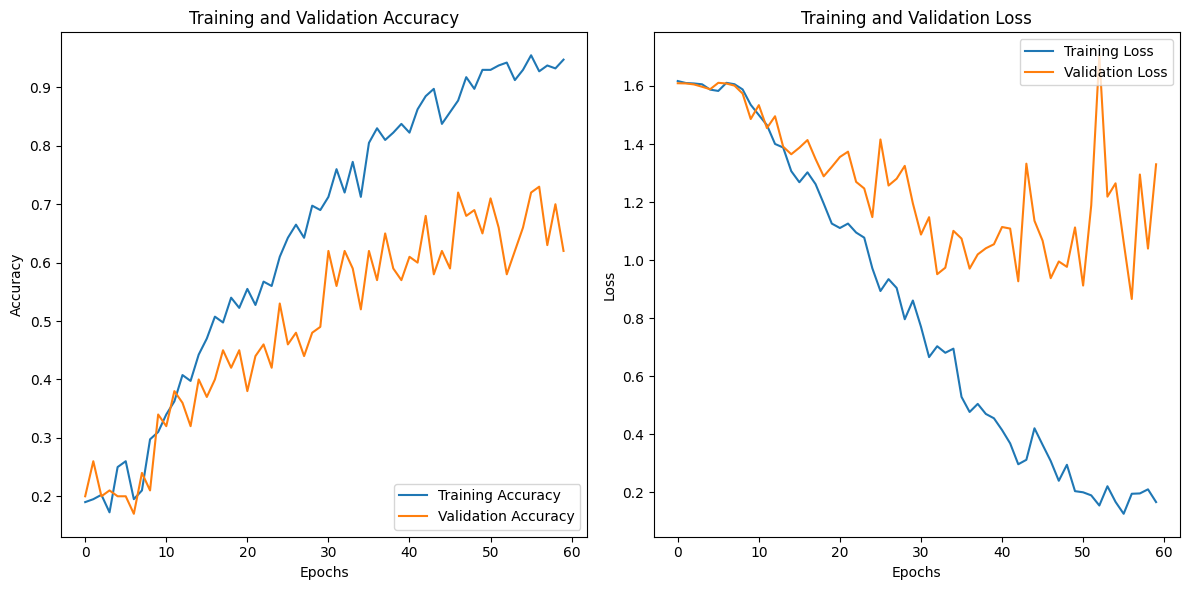

In [ ]:
# Training and Validation Accuracy and Loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


- *The training accuracy curve shows a steady increase, eventually reaching over 90%, while the validation accuracy plateaus around 60-70%, with significant fluctuations. This suggests that the model is overfitting to the training data.*
- *The validation loss fluctuates considerably towards the later epochs, indicating instability in the model’s generalization capability. Despite decreasing training loss, the inconsistent validation loss suggests that the model may benefit from techniques like dropout, data augmentation, or early stopping to improve its robustness.*

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,127,093 (8.11 MB)

 Trainable params: 2,127,093 (8.11 MB)

 Non-trainable params: 0 (0.00 B)


- *The model architecture consists of multiple convolutional layers with increasing filter sizes, which allows it to capture more complex features progressively. However, with over 2 million parameters, it may be prone to overfitting, especially with a small dataset.*
- *The inclusion of a dropout layer before the dense layers was to reduce overfitting. However, additional techniques like batch normalization or data augmentation might further improve generalization.*

**7. C) How many parameters does the network have? How many of those parameters are bias parameters?**

In [ ]:
# Number of parameters
total_params = model.count_params()

# Number of bias parameters
bias_params = sum([np.prod(p.shape) for p in model.trainable_weights if 'bias' in p.name])

print(f"Number of Parameters in Network: {total_params:,}")
print(f"Number of Bias Parameters in Network: {bias_params:,}")

Number of Parameters in Network: 2,127,093
Number of Bias Parameters in Network: 1,389


References:

- https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html
- https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- https://www.tensorflow.org/
https://www.tensorflow.org/tutorials/images/cnn